In [3]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
#load dataset 
df = pd.read_csv('data.csv')

In [7]:
print(df.head())

   user_id  item_id  click_count  view_time_sec  scroll_depth  add_to_cart  \
0       82       46           16          23.72            12            0   
1       15       78           19         134.94             6            0   
2        4        4            5         111.32            50            1   
3       95      182           11         160.69            73            1   
4       36      137           11         248.82            70            0   

   purchase  search_query_count  session_duration_sec  position  
0         0                   3                275.15         3  
1         0                   3                544.10         7  
2         0                   5                346.51        14  
3         0                   4                202.25         9  
4         0                   1                214.98        10  


In [9]:
features  = ['click_count', 'view_time_sec', 'scroll_depth', 'add_to_cart', 'purchase', 'search_query_count', 'session_duration_sec', 'position']
x = df[features]

In [17]:
#scale features so everything is uniform
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [19]:
# Choosing k using the elbow method 
inertia = []
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

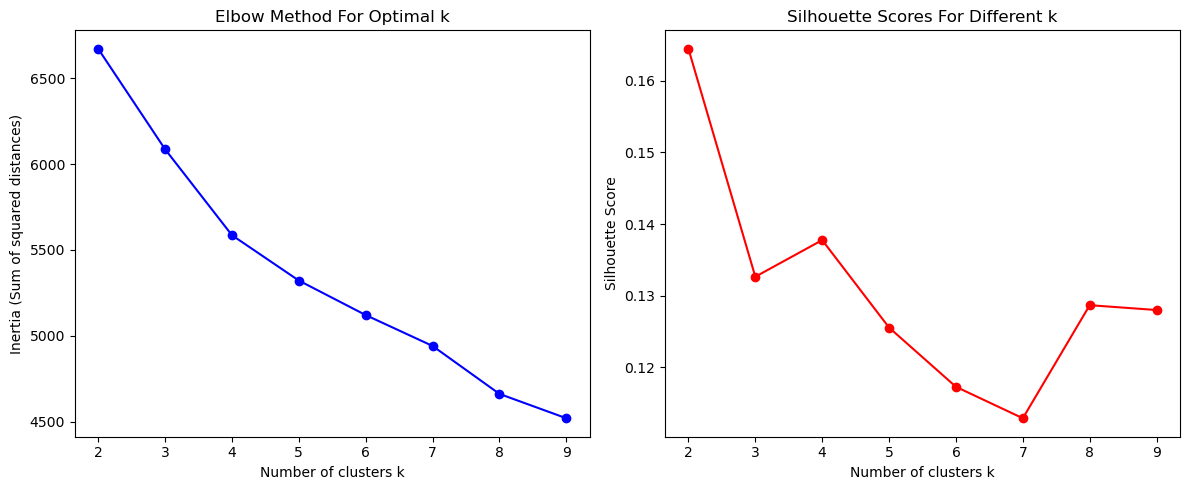

         click_count  view_time_sec  scroll_depth  add_to_cart  purchase  \
cluster                                                                    
0          10.386719      94.664336     56.242188          0.0       0.0   
1          10.786885     153.793730     47.405738          1.0       1.0   
2          10.392157     152.237176     54.854902          1.0       0.0   
3           9.755102     202.681673     48.477551          0.0       0.0   

         search_query_count  session_duration_sec   position  
cluster                                                       
0                  3.480469            352.284609  11.484375  
1                  2.569672            291.390082  10.520492  
2                  2.435294            304.370784  10.270588  
3                  1.812245            241.175510   9.571429  


In [23]:
#plot inertia and silhouette scores 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
# No plt.ylim() or plt.xlim() here; autoscale is default

plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')

plt.tight_layout()
plt.show()

# From plots, select optimal k = 4 based on elbow and silhouette

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# Interpret clusters: summary statistics per cluster
cluster_summary = df.groupby('cluster')[features].mean()

print(cluster_summary)

In [25]:
#example users from clusters
for cluster_label in range(k_optimal):
    print(f"\nCluster {cluster_label} example rows:")
    print(df[df['cluster'] == cluster_label].head(2))
#save results to csv for further analysis if needed 
df.to_csv('clustered_user_interactions.csv', index=False)


Cluster 0 example rows:
   user_id  item_id  click_count  view_time_sec  scroll_depth  add_to_cart  \
0       82       46           16          23.72            12            0   
1       15       78           19         134.94             6            0   

   purchase  search_query_count  session_duration_sec  position  cluster  
0         0                   3                275.15         3        0  
1         0                   3                544.10         7        0  

Cluster 1 example rows:
    user_id  item_id  click_count  view_time_sec  scroll_depth  add_to_cart  \
11       95      179           20         176.28            11            1   
12       70       33           20         201.44            37            1   

    purchase  search_query_count  session_duration_sec  position  cluster  
11         1                   0                472.09         4        1  
12         1                   2                159.96         5        1  

Cluster 2 example rows: